<a href="https://colab.research.google.com/github/billyleer97/HousingPrices/blob/main/housing_prices_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downloading data


In [1]:
!pip install kaggle
from google.colab import files


files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bigbillsinthehouse","key":"76e066fb45dc64c45b362b0bc67d508f"}'}

In [2]:
import csv as csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c house-prices-advanced-regression-techniques

  0% 0.00/441k [00:00<?, ?B/s]
100% 441k/441k [00:00<00:00, 49.9MB/s]
  0% 0.00/13.1k [00:00<?, ?B/s]
100% 13.1k/13.1k [00:00<00:00, 24.8MB/s]
  0% 0.00/450k [00:00<?, ?B/s]
100% 450k/450k [00:00<00:00, 64.8MB/s]
  0% 0.00/31.2k [00:00<?, ?B/s]
100% 31.2k/31.2k [00:00<00:00, 46.0MB/s]


In [5]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Cleaning Data


In [ ]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
nan_values = pd.DataFrame(train_data.isnull().mean()*100)
print(nan_values.to_string())
# display each columns' percentage of null values

BsmtQual        2.534247
BsmtCond        2.534247
BsmtExposure    2.602740
BsmtFinType1    2.534247
BsmtFinType2    2.602740
FireplaceQu    47.260274
GarageType      5.547945
GarageYrBlt     5.547945
GarageFinish    5.547945
GarageQual      5.547945
GarageCond      5.547945
Electrical      0.068493

we have a list of the columns with null values, and the percentage of null values for each column. there are a few over 90% null values.
These columns include Alley, PoolQC, and MiscFeature. 
We are going to remove these from our data set. But we are going to first copy the training data set to another, so that we do not affect the original data set. 

In [6]:
dataset = train_data.copy()
dataset.drop(columns=['Alley','PoolQC','MiscFeature'], axis=1,inplace=True)

Now let's dive into our other columns with nan values. The quantitative variables can have their na values filled by the mean, it will help us shape the distribution of the column and while it may add bias it should be okay. The categorical variables will need their na values filled individually, depending on the case. Look to use mode values to impute for the categorical values.



LotFrontage

In [7]:
dataset['LotFrontage'].unique() 
dataset['LotFrontage'].fillna(dataset['LotFrontage'].mean(), inplace=True)
dataset['LotFrontage'].isnull().sum()

0

MasVnrType

In [ ]:
dataset['MasVnrType'].unique()
dataset['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [8]:
dataset['MasVnrType'].fillna('None', inplace=True)
dataset['MasVnrType'].isnull().sum()

0

MasVnrArea

In [ ]:
dataset['MasVnrArea'].unique() 

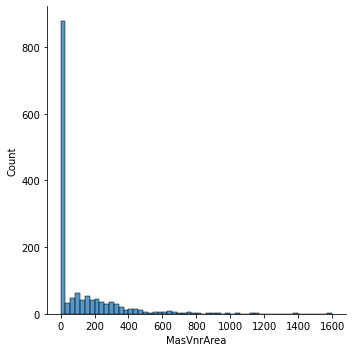

In [9]:
dataset['MasVnrArea'].fillna(dataset['MasVnrArea'].mean(), inplace=True)
dataset['MasVnrArea'].isnull().sum()
sns.displot(dataset['MasVnrArea'])

BsmtQual

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


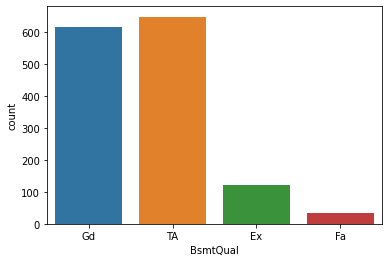

In [ ]:
dataset['BsmtQual'].unique()
dataset['BsmtQual'].value_counts()
sns.countplot(dataset['BsmtQual'])

In [10]:
dataset['BsmtQual'].fillna('TA', inplace=True)

BsmtCond

In [ ]:
dataset['BsmtCond'].unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


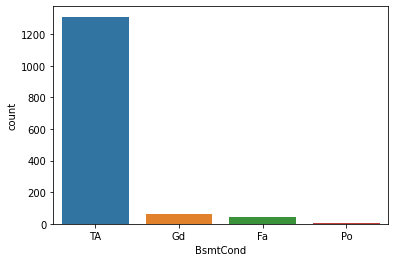

In [ ]:
sns.countplot(dataset['BsmtCond'])

In [11]:
dataset['BsmtCond'].fillna('TA', inplace=True)

BsmtExposure

In [ ]:
dataset['BsmtExposure'].unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


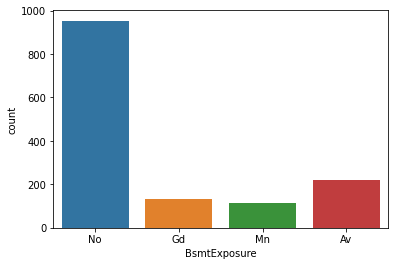

In [ ]:
sns.countplot(dataset['BsmtExposure'])

In [12]:
dataset['BsmtExposure'].fillna('No', inplace=True)

BsmtFinType1

In [ ]:
dataset['BsmtFinType1'].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


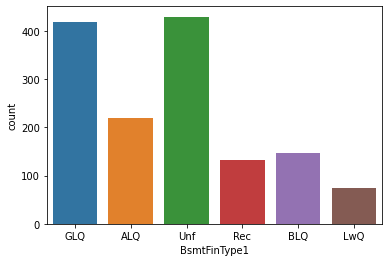

In [ ]:
sns.countplot(dataset['BsmtFinType1'])

In [13]:
dataset['BsmtFinType1'].fillna('Unf', inplace=True)

BsmtFinType2

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


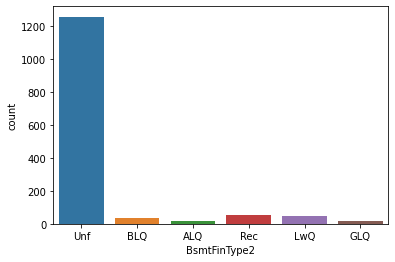

In [ ]:
sns.countplot(dataset['BsmtFinType2'])

In [14]:
dataset['BsmtFinType2'].fillna('Unf', inplace=True)

Electrical

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


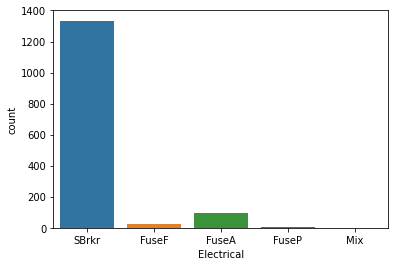

In [ ]:
sns.countplot(dataset['Electrical'])

In [15]:
dataset['Electrical'].fillna('SBrkr', inplace=True)

FireplaceQu

In [ ]:
dataset['FireplaceQu'].isna().mean()*100

47.26027397260274

In [ ]:
dataset['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

Nearly 50% of the values are NA values, so we will fill the values with another value called 'None'.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


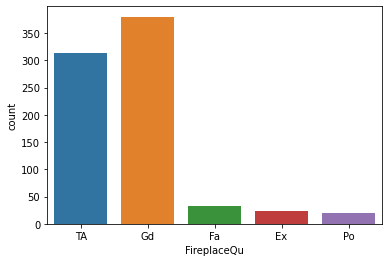

In [ ]:
sns.countplot(dataset['FireplaceQu'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


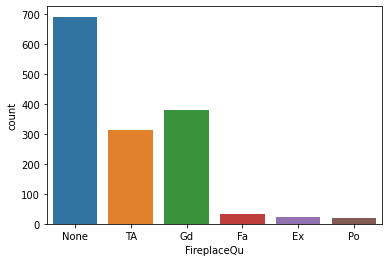

In [16]:
dataset['FireplaceQu'].fillna('None', inplace=True)
sns.countplot(dataset['FireplaceQu']) #checking the results of our imputation

Garagetype

In [ ]:
dataset['GarageType'].value_counts()
#dataset['GarageType'].unique()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


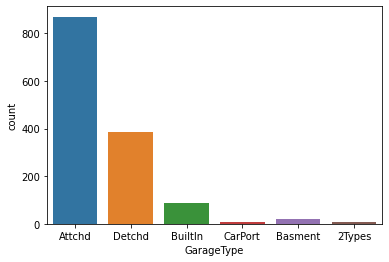

In [ ]:
sns.countplot(dataset['GarageType'])

In [17]:
dataset['GarageType'].fillna('Attchd', inplace=True)

In [ ]:
dataset['GarageType'].value_counts()

Attchd     951
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

GarageYrBlt

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


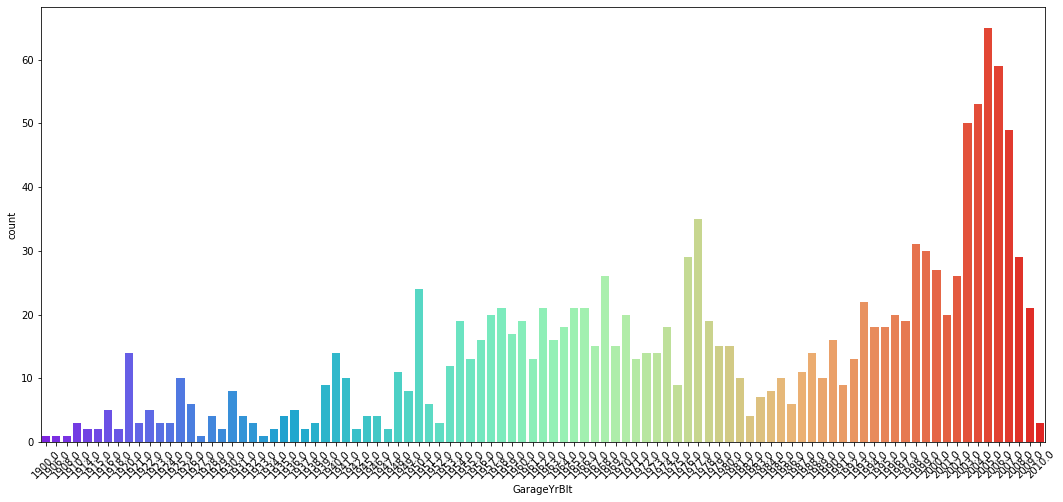

In [ ]:
plt.figure(figsize=(18,8))
sns.countplot(dataset['GarageYrBlt'], palette='rainbow')
plt.xticks(rotation=45)
plt.show()

In [ ]:
dataset['GarageYrBlt'].value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1908.0     1
1927.0     1
1933.0     1
1900.0     1
1906.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

In [18]:
dataset['GarageYrBlt'].fillna('2005', inplace=True)

GarageFinish

In [ ]:
dataset['GarageFinish'].unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


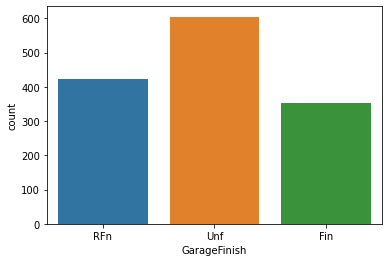

In [ ]:
sns.countplot(dataset['GarageFinish'])

In [19]:
dataset['GarageFinish'].fillna('Unf', inplace=True)

GarageQual

In [ ]:
dataset['GarageQual'].unique()

array(['TA', 'Fa', 'Gd', nan, 'Ex', 'Po'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


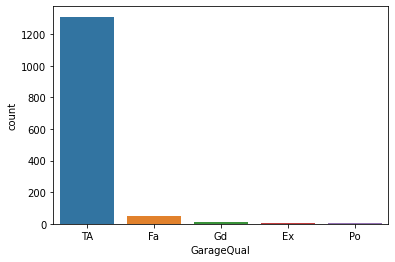

In [ ]:
sns.countplot(dataset['GarageQual'])

In [20]:
dataset['GarageQual'].fillna('TA', inplace=True)

GarageCond

In [ ]:
dataset['GarageCond'].unique()

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


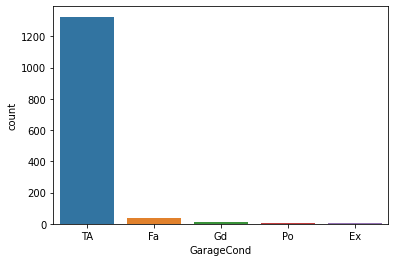

In [ ]:
sns.countplot(dataset['GarageCond'])

In [21]:
dataset['GarageCond'].fillna('TA', inplace=True)

Fence

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


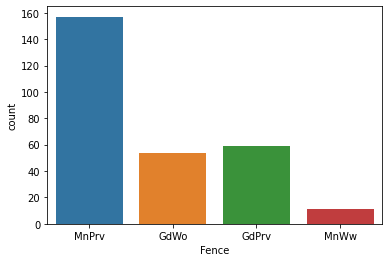

In [ ]:
sns.countplot(dataset['Fence'])

In [ ]:
dataset['Fence'].isnull().mean()*100

80.75342465753424

80% null values is a lot. A popular missing data threshold for features is right at 80%. So we will remove fence. 

In [22]:
dataset.drop('Fence', axis=1, inplace=True)

# Split data features

Separate the columns and features into categorical vs quantitative.


In [23]:
quant_feat = [col for col in dataset.columns if dataset[col].dtypes != 'O']
len(quant_feat)

37

In [68]:
cat_feat = dataset[set(dataset.columns) - set(quant_feat)]


encode categorical variables 

In [ ]:
for i in cat_feat:
    print(i)
    print(dataset[i].unique())
    print("------------------------------------")

Using LabelEncoder to encode categorical features. 


In [26]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
for i in cat_feat:
    dataset[i] = label.fit_transform(dataset[i].astype(str))

checking out any last null values. 

In [53]:
data_null = [i for i in dataset.columns if dataset[i].isnull().sum() > 0]
data_null

[]

Save the dataset to a csv.


In [28]:
dataset.to_csv('final_dataset',header=True, index=False)

In [29]:
final_dataset = pd.read_csv('./final_dataset')
final_dataset.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,196.0,2,4,2,2,3,3,2,706,5,0,150,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,3,1,89,1,2,548,4,4,2,0,61,0,0,0,0,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,2,0.0,3,4,1,2,3,1,0,978,5,0,284,1262,1,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,5,1,62,1,2,460,4,4,2,298,0,0,0,0,0,0,5,2007,8,4,181500


Variable separation. X values, the whole dataset without the salesprice. y values the saleprice only. 


In [30]:
X_train = final_dataset.drop('SalePrice', axis=1)
y_train = final_dataset['SalePrice']

Scale the x values, using standard scaler. Scales the data to have a mean of 0 and variance of 1. 


In [31]:
columns = X_train.columns
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scaled = scale.fit(X_train)
X_train_scaled = pd.DataFrame(scale.transform(X_train), columns=columns)

In [ ]:
X_train_scaled.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,-1.730865,0.073375,-0.045532,-0.229372,-0.207142,0.064238,0.750731,0.314667,-0.02618,0.604670,-0.225716,-1.206215,-0.036289,-0.03174,-0.411691,1.026689,0.651479,-0.517200,1.050994,0.878668,-0.491516,-0.125797,0.743092,0.751626,-1.241449,0.511418,-0.777976,0.364207,0.835599,-0.324152,0.281048,0.628912,-0.429918,0.575425,0.307315,-0.288653,-0.944591,-0.459303,-0.123046,-0.884658,0.263813,0.302403,-0.793434,1.161852,-0.120242,0.370333,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,-0.409369,0.912210,0.255978,-0.951226,-0.075117,-0.686776,0.927204,-0.281887,0.311725,0.351000,0.215646,0.186019,0.289745,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,0.313867,0.208502
1,-1.728492,-0.872563,-0.045532,0.451936,-0.091886,0.064238,0.750731,0.314667,-0.02618,-0.628316,-0.225716,1.954302,-1.188074,-0.03174,-0.411691,-0.543457,-0.071836,2.179628,0.156734,-0.429577,-0.491516,-0.125797,-0.508251,-0.661060,0.387047,-0.574410,0.663451,0.364207,-0.549162,-0.324152,0.281048,-1.128430,-1.518697,1.171992,0.307315,-0.288653,-0.641228,0.466465,-0.123046,-0.884658,0.263813,0.302403,0.257140,-0.795163,-0.120242,-0.482512,-0.819964,3.948809,0.789741,-0.761621,0.163779,-0.211454,0.795629,-0.318683,0.255978,0.600495,1.638498,-0.686776,-0.178407,-0.281887,0.311725,-0.060731,0.215646,0.186019,0.289745,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,0.313867,0.208502


# Test Data (Repeat engineering process)


Test data. Repeat the processes from above with test data all the same. 


In [ ]:
test_data.head()

In [32]:
test_data.drop(columns=['Alley','PoolQC','MiscFeature','Fence'], axis=1,inplace=True)
test_data['GarageCond'].fillna('TA', inplace=True)
test_data['GarageQual'].fillna('TA', inplace=True)
test_data['GarageFinish'].fillna('Unf', inplace=True)
test_data['GarageYrBlt'].fillna('2005', inplace=True)
test_data['GarageType'].fillna('Attchd', inplace=True)
test_data['FireplaceQu'].fillna('None', inplace=True)
test_data['Electrical'].fillna('SBrkr', inplace=True)
test_data['BsmtFinType2'].fillna('Unf', inplace=True)
test_data['BsmtFinType1'].fillna('Unf', inplace=True)
test_data['BsmtExposure'].fillna('No', inplace=True)
test_data['BsmtCond'].fillna('TA', inplace=True)
test_data['BsmtQual'].fillna('TA', inplace=True)
test_data['MasVnrArea'].fillna(dataset['MasVnrArea'].mean(), inplace=True)
test_data['MasVnrType'].fillna('None', inplace=True)
test_data['LotFrontage'].fillna(dataset['LotFrontage'].mean(), inplace=True)

In [33]:
label = LabelEncoder()
for i in cat_feat:
    test_data[i] = label.fit_transform(test_data[i].astype(str))

In [34]:
test_null = [i for i in test_data.columns if test_data[i].isnull().sum() > 0]
test_null

['BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageCars',
 'GarageArea']

In [35]:
for i in test_null:
    test_data[i].fillna(test_data[i].mean(), inplace = True)

Scale the test data

In [52]:
X_test = scale.fit(test_data)
X_test_scaled = pd.DataFrame(scale.transform(test_data), columns=columns)

In [54]:
X_test_scaled.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,-1.730864,-0.874711,-1.492896,0.544280,0.363929,0.06426,0.742620,0.3187,-0.03705,0.572445,-0.207992,-0.105672,-1.193183,0.028691,-0.426625,-0.43183,-0.751101,0.400766,-0.340945,-1.072885,-0.474315,-0.09948,0.682300,0.727713,0.382679,-0.57028,0.673548,0.388852,-0.533007,0.839283,0.290347,0.620425,0.636062,0.063295,-1.578965,0.517348,-0.650619,-0.370808,-0.084379,1.415522,0.272716,0.296079,-0.654561,-0.775254,-0.080483,-1.215588,-0.819568,-0.258526,-1.02872,-0.751040,-1.029543,-0.20391,0.768327,-0.918335,0.256523,-0.898055,-0.049484,-0.689701,-0.740660,0.933169,-0.988013,1.185945,0.250409,0.186902,0.339114,0.366678,-0.701628,-0.360738,-0.088827,1.818960,-0.057227,-0.092244,-0.038281,1.713905,0.324245,0.201383
1,-1.728490,-0.874711,-0.046591,0.592916,0.897861,0.06426,-1.384637,0.3187,-0.03705,-1.950811,-0.207992,-0.105672,-0.056113,0.028691,-0.426625,-0.43183,-0.054877,0.400766,-0.439695,-1.214908,2.006065,-0.09948,1.094164,1.046743,-1.293983,0.04110,0.673548,0.388852,-0.533007,0.839283,0.290347,0.620425,-1.576129,1.063392,0.324927,-0.297903,-0.339378,0.639144,-0.084379,1.415522,0.272716,0.296079,0.433298,-0.775254,-0.080483,-0.323539,-0.819568,-0.258526,-1.02872,1.237648,0.175997,-0.20391,-0.422947,-0.255371,0.256523,-0.898055,-0.049484,-0.689701,-0.860225,0.933169,-0.988013,-0.741213,0.250409,0.186902,0.339114,2.347867,-0.178826,-0.360738,-0.088827,-0.301543,-0.057227,19.730438,-0.038281,1.713905,0.324245,0.201383


# Select best algorithm

Let's check for the best features.


In [42]:
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import f_regression,  f_classif
# from matplotlib import pyplot

In [ ]:
# num_feats = SelectKBest(score_func=f_regression, k='all')
# # apply feature selection
# num_feats.fit(X_train, y_train)
# for i in range(len(num_feats.scores_)):
# 	print('Feature %d: %f' % (i, num_feats.scores_[i]))
# # plot the scores
# pyplot.bar([i for i in range(len(num_feats.scores_))], num_feats.scores_)
# pyplot.show()

In [60]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train_scaled,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
y_tr=lr.predict(X_train_scaled)

In [63]:
lr.intercept_

180937.4438611527

In [65]:
lr.score(X_train_scaled, y_train)

0.8498635468326557

In [75]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [78]:
lin_reg = AdaBoostRegressor()
model = lin_reg.fit(X_train_scaled, y_train)
model.score(X_train_scaled, y_train)

0.8769483077167348

In [77]:
grad_reg = GradientBoostingRegressor()
model2 = grad_reg.fit(X_train_scaled, y_train)
model2.score(X_train_scaled, y_train)

0.9645700467630046

In [79]:
predictions = model2.predict(X_test_scaled)
sampler = pd.read_csv('sample_submission.csv')
result = pd.DataFrame({sampler.columns[0] : sampler['Id'],
                        sampler.columns[1] : predictions})
result.to_csv('submission.csv', index=False)